In [2]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [33]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
# print np.cov(data.T)

(800, 2)


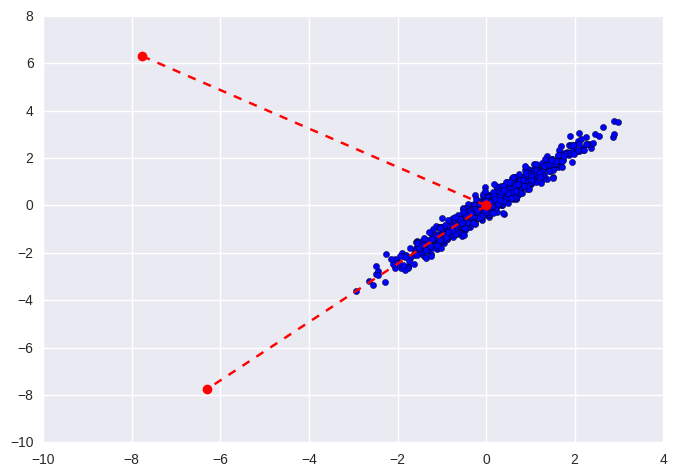

In [53]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [34]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    Z = X.dot(W)
    return eig_val, eig_vec

In [36]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [38]:
print lam
print W

[ 0.02554763  2.35983471]
[[-0.77619714 -0.63049029]
 [ 0.63049029 -0.77619714]]


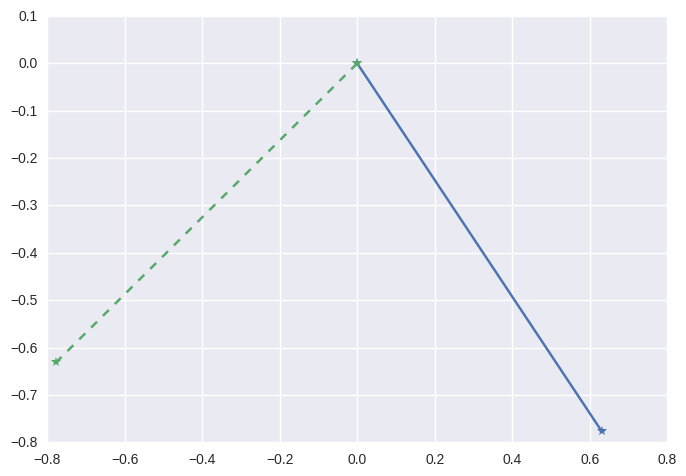

In [50]:
plt.plot([0, W[1, 0]], [0, W[0, 0]], '*-')
plt.plot([0, W[1, 1]], [0, W[0, 1]], '*--')

In [65]:
Z = data.dot(W[:, 0])
print Z.shape
print Z[:10]

(800,)
[-0.17312798  0.07603823 -0.15501807  0.09639131 -0.17132057  0.15012098
  0.08258546 -0.0312436   0.00899464  0.1553472 ]


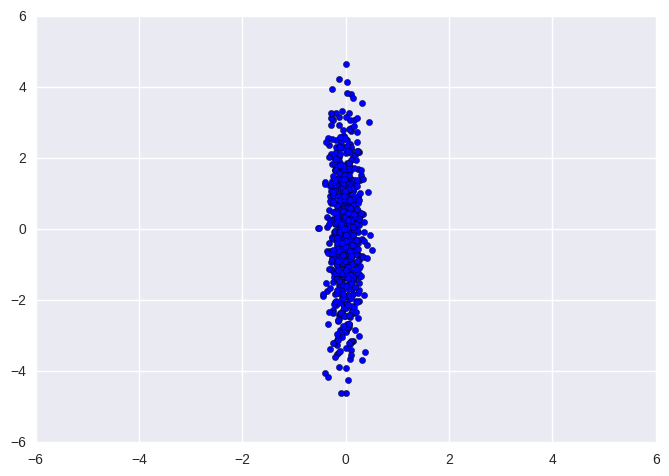

In [60]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(Z[:, 0], Z[:, 1])
# plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
# plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [62]:
np.cov(Z.T)

array([[  2.55476286e-02,  -4.26581312e-16],
       [ -4.26581312e-16,   2.35983471e+00]])

In [71]:
print np.cumsum(lam[::-1]/lam.sum())

[ 0.98928992  1.        ]


# PCA on MNIST

In [109]:
ds = pd.read_csv('../data/train.csv')
data = ds.values[:10000, 1:]
print data.shape

(10000, 784)


In [110]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [111]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [112]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [113]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [114]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

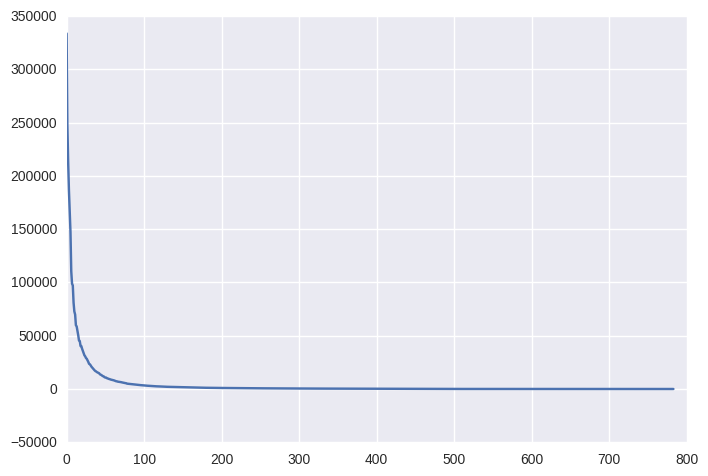

In [115]:
plt.plot(sorted_lambda)

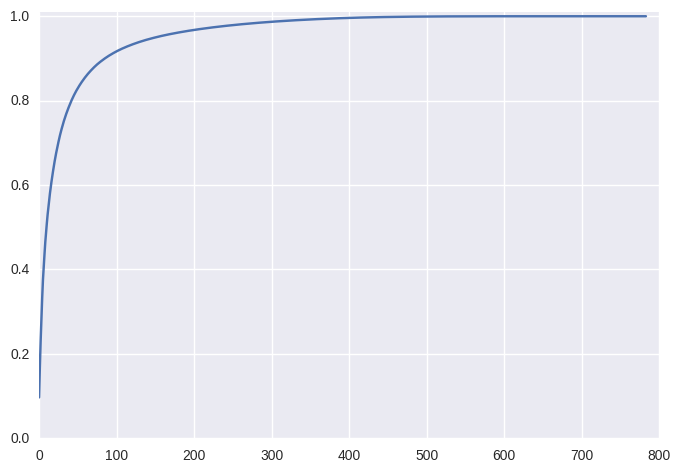

In [116]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [117]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())

In [121]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] <= 0.99:
        pass
    else:
        print ix
        break

326


In [146]:
k = 148
W = sorted_W[:, :k]
Z = data.dot(W)
print Z.shape

(10000, 148)


In [151]:
X_reconstruct = Z.dot(W.T)
print X_reconstruct.shape

print np.asarray(X_reconstruct[0], dtype='uint8')

(10000, 784)
[  0   2 254   0   0 253 255 254   3 255   1   2   0   0 252 255 253   0
   4   3   2   2   0   0   2   6   0   1 252 255 253 255   0 254   7   2
   5 255 248 244   3   3 253   1   1   1 251   8   0  13 253   3 255 250
 255   1   9  15 244 254 248  20   5 253 250 253   6 253   0   9 244  19
 255 243 248 253 241 249   0  12 247  31 254   8 249   1 248 252   0   8
 247  11   8 238   6  21  14  19 254 232 252 242 246 249   0 248   0   7
 245   4   9 233   9   0 254 239  37 234  12   0   6   9  17  18 250 250
 241  23 241  20 239  32  21  17 245 242 239  18 240 237 249 226  14 248
 236 239  31  27  23 252   1 244  29 255 252   9 222  17 234  13   2  32
   7  19 232   3  34 248 251   9  26 242   1 243   9 246 239 241  31 247
  33  21 226   8  41 226 249  32  23  13  33  18   4 236   2  32  17   1
 233   5 235 255   0  12 249 240 254  10  13 255   0   9 228 247   0  18
  18 251 232  13  15  13 243 247   0 252   6 244 236   5 238 253  10   3
 237   5 241 251  15   9  33  26 226  

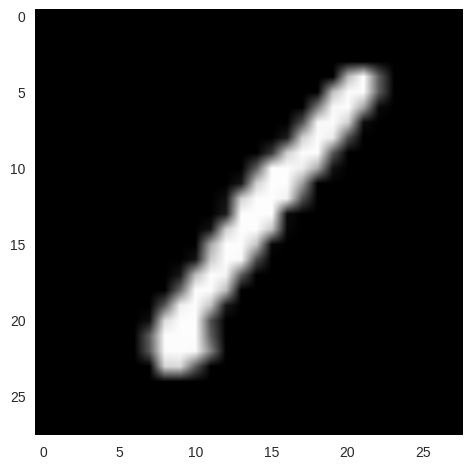

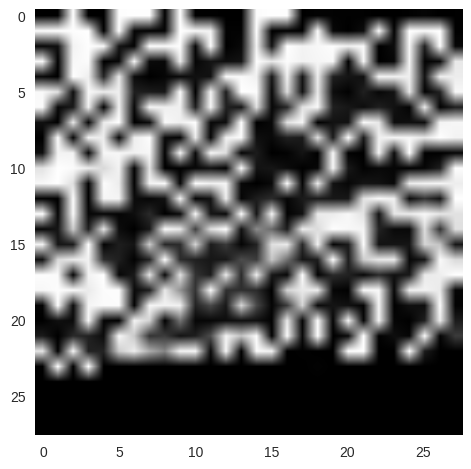

In [145]:
N = 0
plt.figure(0)
plt.grid("off")
plt.imshow(data[N].rX_reconstructeshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid("off")
plt.imshow(np.asarray(X_reconstruct[N].reshape((28, 28)), dtype='uint8'), cmap='gray')

plt.show()

In [152]:
from sklearn.decomposition import PCA